# Headers

In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import time
from sklearn.decomposition import PCA
import seaborn as sns

In [11]:
df = pd.read_csv("C:/Users/ngaut/Documents/Ironhack/Week10/spotify_song.csv")
df

,title,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,BIRDS OF A FEATHER,Billie Eilish,0.747,0.507,2,-10.171,0.0358,0.20000,0.060800,0.1170,0.438,104.978
1,Espresso,Sabrina Carpenter,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969
2,Die With A Smile,"Lady Gaga, Bruno Mars",0.521,0.592,6,-7.777,0.0304,0.30800,0.000000,0.1220,0.535,157.969
3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930
4,Life,ConKi,0.607,0.817,0,-5.839,0.0485,0.13000,0.000017,0.5600,0.338,112.052
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Nice To Meet You,Myles Smith,0.762,0.783,5,-5.206,0.0387,0.32900,0.000000,0.0536,0.840,115.091
1139,Love Is The Only Thing,Lost Frequencies,0.608,0.688,5,-8.597,0.0499,0.05540,0.007360,0.0800,0.214,127.938
1140,Over You (feat. Justin Jesso),"Ofenbach, Justin Jesso",0.746,0.753,9,-4.667,0.2340,0.00435,0.000002,0.0600,0.848,115.865
1141,Drum (feat. Lena Sue),"Alle Farben, Parov Stelar, Lena Sue",0.868,0.888,9,-4.443,0.0458,0.06670,0.048100,0.0454,0.969,124.017


# Scaling

In [13]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [14]:
df

,title,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,BIRDS OF A FEATHER,Billie Eilish,0.747,0.507,2,-10.171,0.0358,0.20000,0.060800,0.1170,0.438,104.978
1,Espresso,Sabrina Carpenter,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969
2,Die With A Smile,"Lady Gaga, Bruno Mars",0.521,0.592,6,-7.777,0.0304,0.30800,0.000000,0.1220,0.535,157.969
3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930
4,Life,ConKi,0.607,0.817,0,-5.839,0.0485,0.13000,0.000017,0.5600,0.338,112.052
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Nice To Meet You,Myles Smith,0.762,0.783,5,-5.206,0.0387,0.32900,0.000000,0.0536,0.840,115.091
1139,Love Is The Only Thing,Lost Frequencies,0.608,0.688,5,-8.597,0.0499,0.05540,0.007360,0.0800,0.214,127.938
1140,Over You (feat. Justin Jesso),"Ofenbach, Justin Jesso",0.746,0.753,9,-4.667,0.2340,0.00435,0.000002,0.0600,0.848,115.865
1141,Drum (feat. Lena Sue),"Alle Farben, Parov Stelar, Lena Sue",0.868,0.888,9,-4.443,0.0458,0.06670,0.048100,0.0454,0.969,124.017


In [15]:
X_scaled

array([[ 0.62631193, -1.2502026 , -0.98503313, ..., -0.51017081,
        -0.2744995 , -0.90570997],
       [ 0.2476338 ,  0.31240746, -1.53653589, ...,  0.00840677,
         0.8048874 , -0.95167891],
       [-1.23415017, -0.72521503,  0.11797237, ..., -0.4720401 ,
         0.14097879,  1.50850222],
       ...,
       [ 0.61807979,  0.26917318,  0.9452265 , ..., -0.94486083,
         1.48164586, -0.40971012],
       [ 1.62240004,  1.10297697,  0.9452265 , ..., -1.05620249,
         1.99992291, -0.03831389],
       [-0.97895404,  0.51004983, -1.26078451, ..., -0.59405835,
        -1.59375016, -0.21722373]])

# Clustering

## KMeans Method

C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

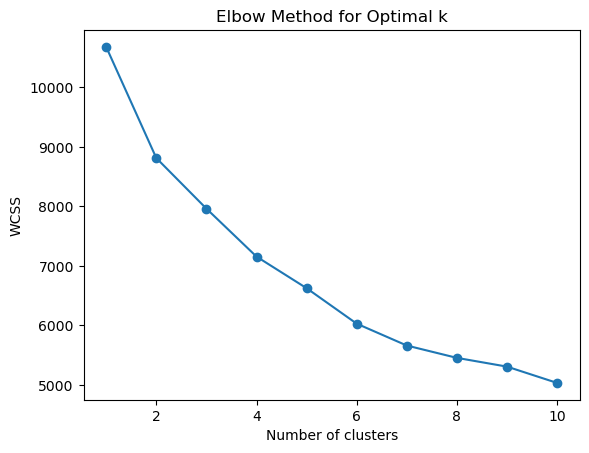

C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score: 0.15


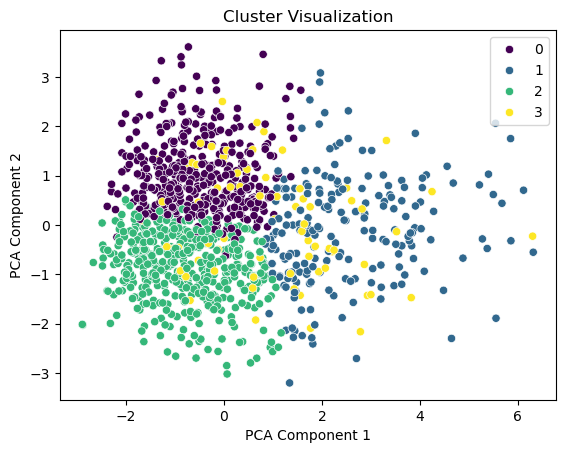

In [18]:
# Apply PCA
pca = PCA(n_components=0.9)  # Retain 90% variance
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose k based on elbow and apply K-Means
optimal_k = 4  # Example, adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score:.2f}')

# Visualize clusters with a scatter plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()

In [19]:
# df with cluster classification
df

,title,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
0,BIRDS OF A FEATHER,Billie Eilish,0.747,0.507,2,-10.171,0.0358,0.20000,0.060800,0.1170,0.438,104.978,1
1,Espresso,Sabrina Carpenter,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969,2
2,Die With A Smile,"Lady Gaga, Bruno Mars",0.521,0.592,6,-7.777,0.0304,0.30800,0.000000,0.1220,0.535,157.969,1
3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,0
4,Life,ConKi,0.607,0.817,0,-5.839,0.0485,0.13000,0.000017,0.5600,0.338,112.052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Nice To Meet You,Myles Smith,0.762,0.783,5,-5.206,0.0387,0.32900,0.000000,0.0536,0.840,115.091,2
1139,Love Is The Only Thing,Lost Frequencies,0.608,0.688,5,-8.597,0.0499,0.05540,0.007360,0.0800,0.214,127.938,0
1140,Over You (feat. Justin Jesso),"Ofenbach, Justin Jesso",0.746,0.753,9,-4.667,0.2340,0.00435,0.000002,0.0600,0.848,115.865,2
1141,Drum (feat. Lena Sue),"Alle Farben, Parov Stelar, Lena Sue",0.868,0.888,9,-4.443,0.0458,0.06670,0.048100,0.0454,0.969,124.017,2


In [20]:
df["Cluster"].value_counts()

Cluster
2    457
0    408
1    203
3     75
Name: count, dtype: int64

In [21]:
df

,title,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
0,BIRDS OF A FEATHER,Billie Eilish,0.747,0.507,2,-10.171,0.0358,0.20000,0.060800,0.1170,0.438,104.978,1
1,Espresso,Sabrina Carpenter,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969,2
2,Die With A Smile,"Lady Gaga, Bruno Mars",0.521,0.592,6,-7.777,0.0304,0.30800,0.000000,0.1220,0.535,157.969,1
3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,0
4,Life,ConKi,0.607,0.817,0,-5.839,0.0485,0.13000,0.000017,0.5600,0.338,112.052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Nice To Meet You,Myles Smith,0.762,0.783,5,-5.206,0.0387,0.32900,0.000000,0.0536,0.840,115.091,2
1139,Love Is The Only Thing,Lost Frequencies,0.608,0.688,5,-8.597,0.0499,0.05540,0.007360,0.0800,0.214,127.938,0
1140,Over You (feat. Justin Jesso),"Ofenbach, Justin Jesso",0.746,0.753,9,-4.667,0.2340,0.00435,0.000002,0.0600,0.848,115.865,2
1141,Drum (feat. Lena Sue),"Alle Farben, Parov Stelar, Lena Sue",0.868,0.888,9,-4.443,0.0458,0.06670,0.048100,0.0454,0.969,124.017,2


In [22]:
df.dtypes

title                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
Cluster               int32
dtype: object

In [23]:
df = df.drop(columns=['Cluster'])
df.dtypes

title                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Best K (for K-Means): 2
Silhouette Score (K-Means): 0.4255953611241019
Davies-Bouldin Score (K-Means): 0.9633122692129322
Calinski-Harabasz Score (K-Means): 841.3104330819502
Silhouette Score (DBSCAN): 0.5084149260354434
Davies-Bouldin Score (DBSCAN): 1.132041744309456
Calinski-Harabasz Score (DBSCAN): 116.3346421620661
                title                 artist  danceability  energy  key  \
0  BIRDS OF A FEATHER          Billie Eilish         0.747   0.507    2   
1            Espresso      Sabrina Carpenter         0.701   0.760    0   
2    Die With A Smile  Lady Gaga, Bruno Mars         0.521   0.592    6   
3           As It Was           Harry Styles         0.520   0.731    6   
4                Life                  ConKi         0.607   0.817    0   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -10.171       0.0358         0.200          0.060800     0.117    0.438   
1    -5.478       0.0285         0.107          0.000065     0.185   

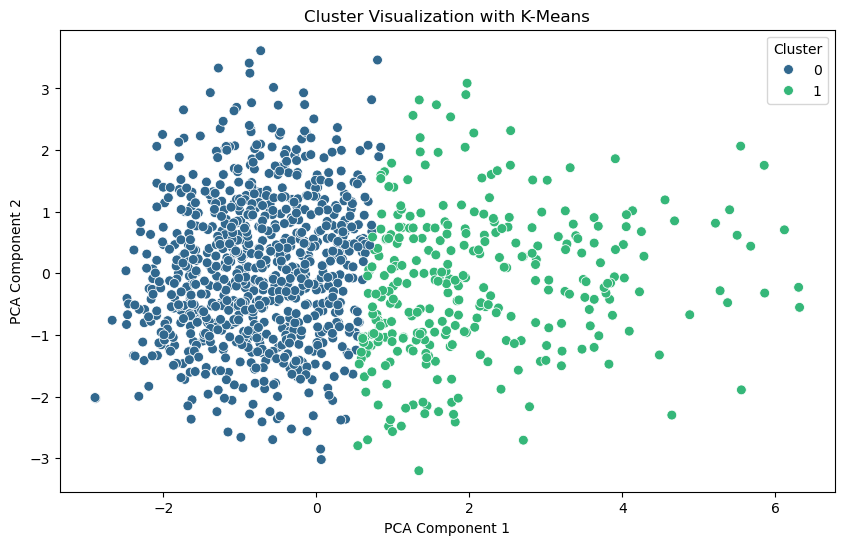

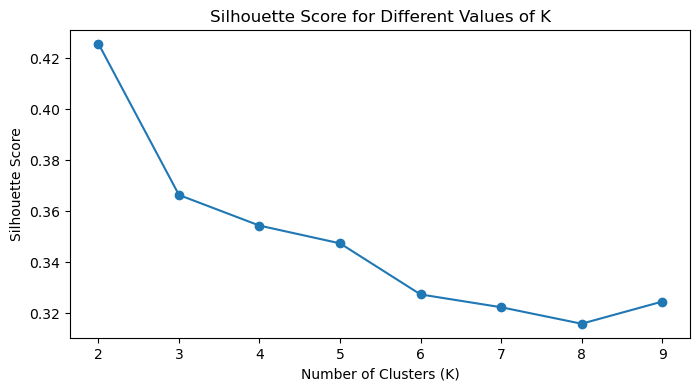

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data (Assuming 'df' is your DataFrame)
# df = your_dataframe  # Make sure your dataframe is loaded

# Step 2: Scale the numerical columns of the dataframe
# Assuming df contains numerical columns for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))  # Scaling only numerical columns

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2D for visualization
data_pca = pca.fit_transform(X_scaled)

# Step 4: K-Means Clustering and Parameter Tuning
best_k = None
best_silhouette = -1
silhouette_scores = []

for k in range(2, 10):  # Trying different values of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

# Fit the best K-Means model
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Evaluation Metrics for K-Means
print(f"Best K (for K-Means): {best_k}")
print("Silhouette Score (K-Means):", silhouette_score(data_pca, kmeans_labels))
print("Davies-Bouldin Score (K-Means):", davies_bouldin_score(data_pca, kmeans_labels))
print("Calinski-Harabasz Score (K-Means):", calinski_harabasz_score(data_pca, kmeans_labels))

# Step 5: DBSCAN Clustering and Parameter Tuning
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Initial parameters
dbscan_labels = dbscan.fit_predict(data_pca)

# Evaluation Metrics for DBSCAN
if len(set(dbscan_labels)) > 1:  # Ensure there is more than one cluster
    print("Silhouette Score (DBSCAN):", silhouette_score(data_pca, dbscan_labels))
    print("Davies-Bouldin Score (DBSCAN):", davies_bouldin_score(data_pca, dbscan_labels))
    print("Calinski-Harabasz Score (DBSCAN):", calinski_harabasz_score(data_pca, dbscan_labels))
else:
    print("DBSCAN did not find more than one cluster with the current parameters.")

# Step 6: Assign Cluster Labels to DataFrame
# Remove the existing 'cluster' column if it exists
if 'cluster' in df.columns:
    df = df.drop(columns=['cluster'])

# Assign new cluster labels from the best K-Means model to the DataFrame
df['cluster'] = kmeans_labels  # Assigning the K-Means cluster labels

# Now df contains the updated cluster labels
print(df.head())  # Print the first few rows to check

# Step 7: Visualize Clustering Results for the best model (K-Means)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette="viridis", s=50, marker='o')
plt.title("Cluster Visualization with K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 8: Visualize Silhouette Scores for different K values
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score for Different Values of K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [25]:
df


,title,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,BIRDS OF A FEATHER,Billie Eilish,0.747,0.507,2,-10.171,0.0358,0.20000,0.060800,0.1170,0.438,104.978,1
1,Espresso,Sabrina Carpenter,0.701,0.760,0,-5.478,0.0285,0.10700,0.000065,0.1850,0.690,103.969,0
2,Die With A Smile,"Lady Gaga, Bruno Mars",0.521,0.592,6,-7.777,0.0304,0.30800,0.000000,0.1220,0.535,157.969,1
3,As It Was,Harry Styles,0.520,0.731,6,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,0
4,Life,ConKi,0.607,0.817,0,-5.839,0.0485,0.13000,0.000017,0.5600,0.338,112.052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Nice To Meet You,Myles Smith,0.762,0.783,5,-5.206,0.0387,0.32900,0.000000,0.0536,0.840,115.091,0
1139,Love Is The Only Thing,Lost Frequencies,0.608,0.688,5,-8.597,0.0499,0.05540,0.007360,0.0800,0.214,127.938,1
1140,Over You (feat. Justin Jesso),"Ofenbach, Justin Jesso",0.746,0.753,9,-4.667,0.2340,0.00435,0.000002,0.0600,0.848,115.865,0
1141,Drum (feat. Lena Sue),"Alle Farben, Parov Stelar, Lena Sue",0.868,0.888,9,-4.443,0.0458,0.06670,0.048100,0.0454,0.969,124.017,0


## DBSCAN Method


In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of `eps` and `min_samples` values to try
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(3, 10)

# Initialize variables to keep track of the best model
best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Ignore models with only one cluster or all points marked as noise
        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X_scaled, labels)
            print(f"DBSCAN with eps={eps} and min_samples={min_samples} has silhouette score {score:.2f}")
            
            # Keep track of the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score:.2f}")

# Final DBSCAN model with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)


DBSCAN with eps=0.6 and min_samples=3 has silhouette score -0.18
DBSCAN with eps=0.6 and min_samples=4 has silhouette score -0.18
DBSCAN with eps=0.7000000000000001 and min_samples=3 has silhouette score -0.32
DBSCAN with eps=0.7000000000000001 and min_samples=4 has silhouette score -0.18
DBSCAN with eps=0.7000000000000001 and min_samples=5 has silhouette score -0.18
DBSCAN with eps=0.8 and min_samples=3 has silhouette score -0.36
DBSCAN with eps=0.8 and min_samples=4 has silhouette score -0.30
DBSCAN with eps=0.8 and min_samples=5 has silhouette score -0.27
DBSCAN with eps=0.8 and min_samples=6 has silhouette score -0.21
DBSCAN with eps=0.8 and min_samples=7 has silhouette score -0.21
DBSCAN with eps=0.8 and min_samples=8 has silhouette score -0.17
DBSCAN with eps=0.9 and min_samples=3 has silhouette score -0.34
DBSCAN with eps=0.9 and min_samples=4 has silhouette score -0.33
DBSCAN with eps=0.9 and min_samples=5 has silhouette score -0.30
DBSCAN with eps=0.9 and min_samples=6 has sil

### Conclusion: K-means performs better than DBSCAN 

# Recommendation

In [30]:
def recommend_songs(input_song, df):
    # Find the cluster of the input song
    song_cluster = df[df['title'] == input_song]['Cluster'].values[0]  # Use 'title' here
    
    # Get songs from the same cluster
    recommended_songs = df[df['Cluster'] == song_cluster]
    
    # Optionally, exclude the input song itself from recommendations
    recommended_songs = recommended_songs[recommended_songs['title'] != input_song]  # Use 'title' here
    
    return recommended_songs[['title', 'artist', 'Cluster']].head(5)  # Show top 5 recommended songs



In [31]:
# Save to CSV
#df.to_csv('spotify_final1.csv', index=False)

# Data Visualization

In [32]:
df.columns

Index(['title', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'cluster'],
      dtype='object')

##  Scatter Plot: Visualizing the Clusters

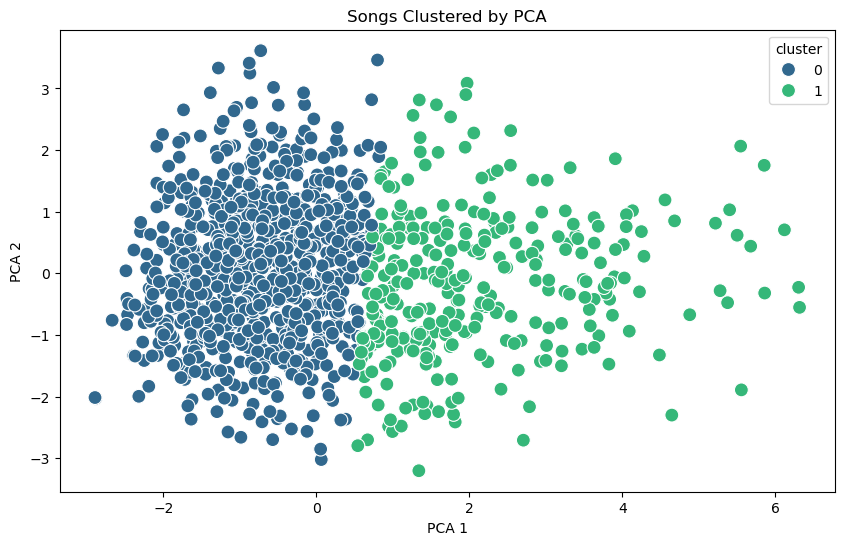

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA result to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis', s=100, marker='o')
plt.title('Songs Clustered by PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ngaut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

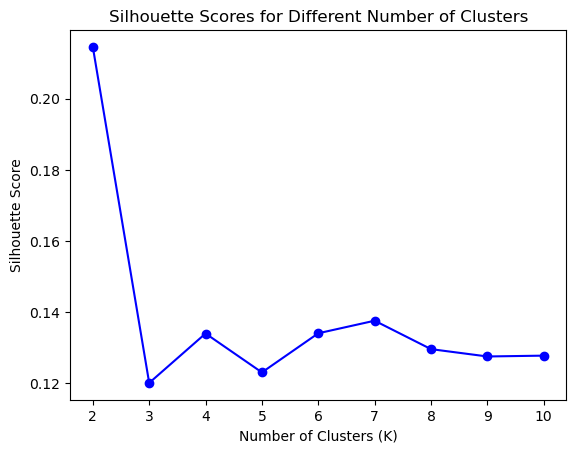

In [45]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Try different k values
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


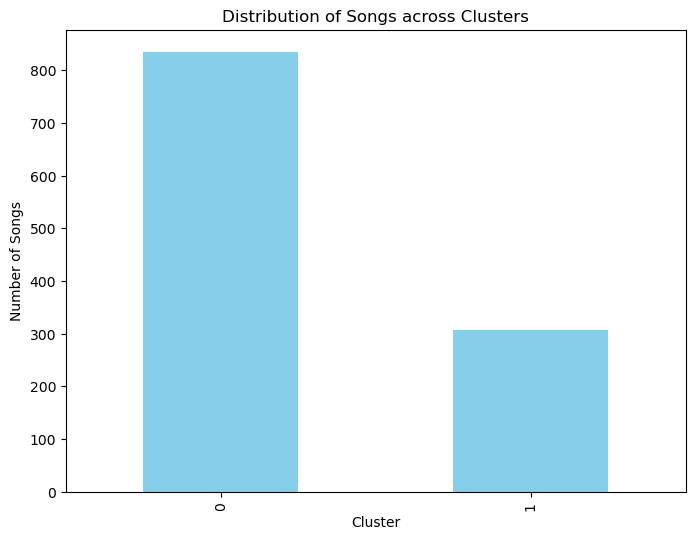

In [49]:
cluster_counts = df['cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Songs across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.show()


## Heatmap: Correlation Matrix

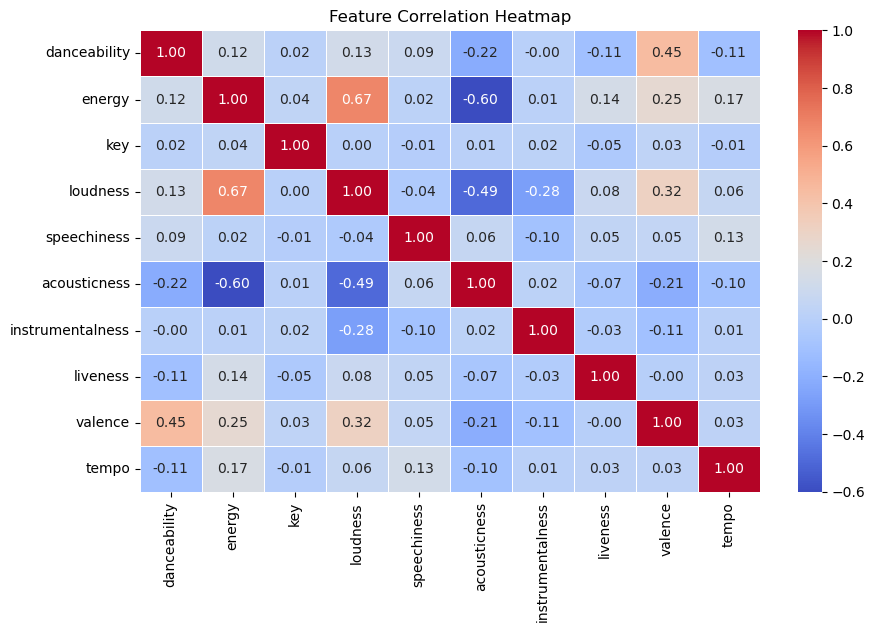

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



## Histogram: Distribution of Song Features (Danceability, Energy, etc.)

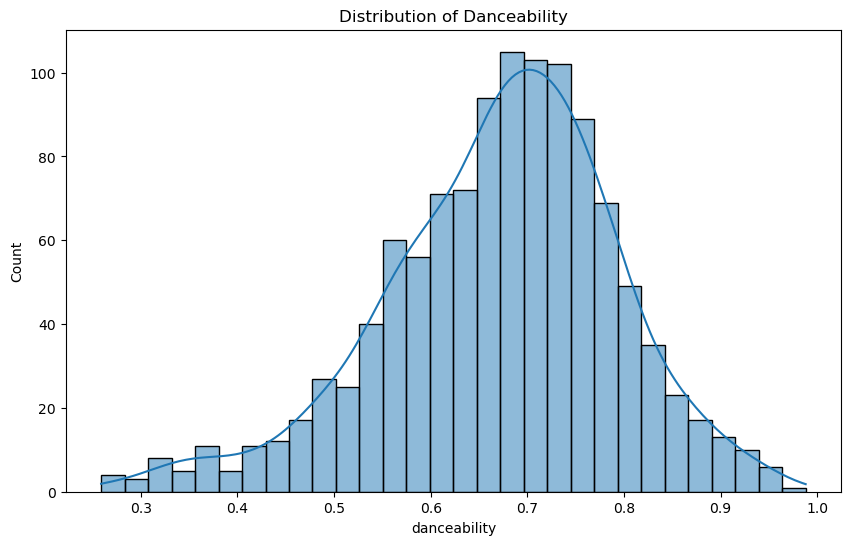

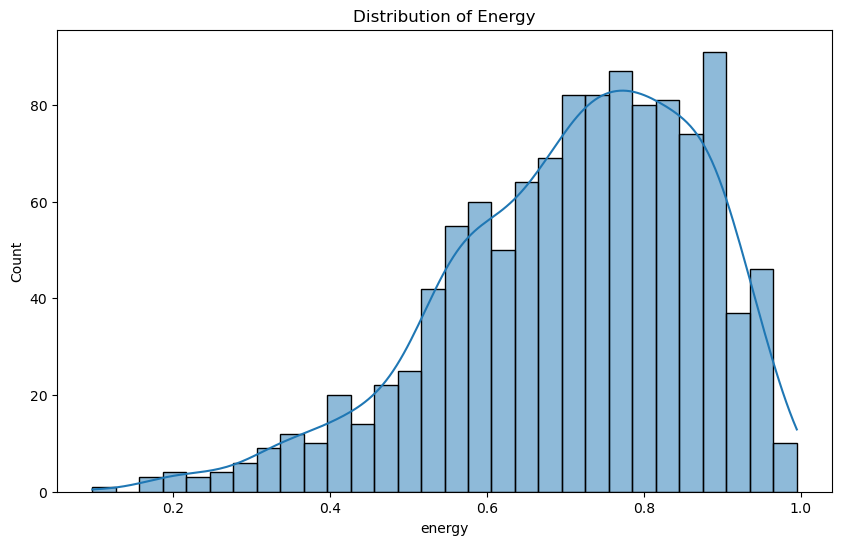

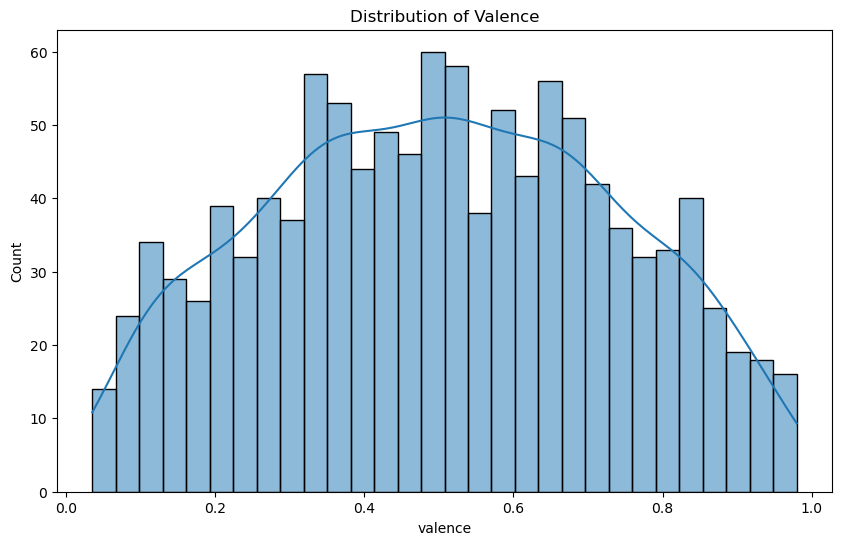

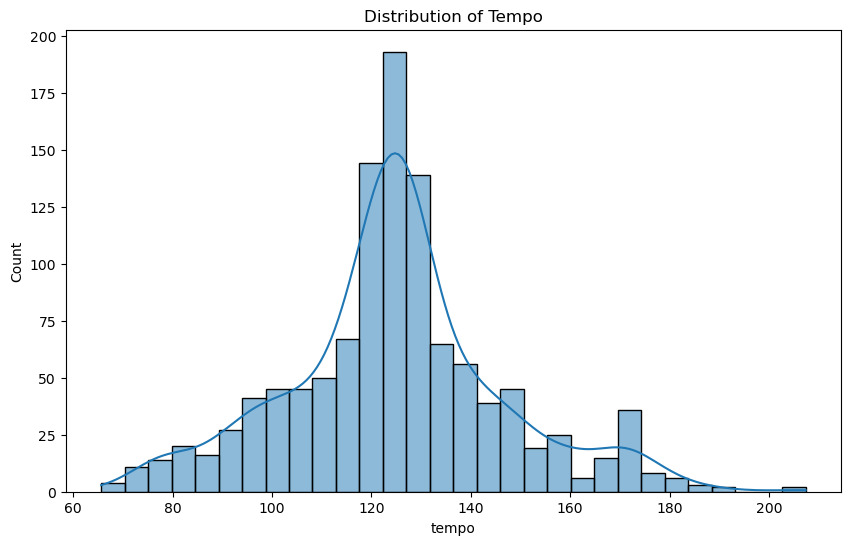

In [59]:
# List of features to plot
features = ['danceability', 'energy', 'valence', 'tempo']

# Plotting histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.show()


## Feature Distributions by Cluster
### If you have clusters assigned to each song (e.g., from K-Means), you can also plot the feature distributions by cluster.

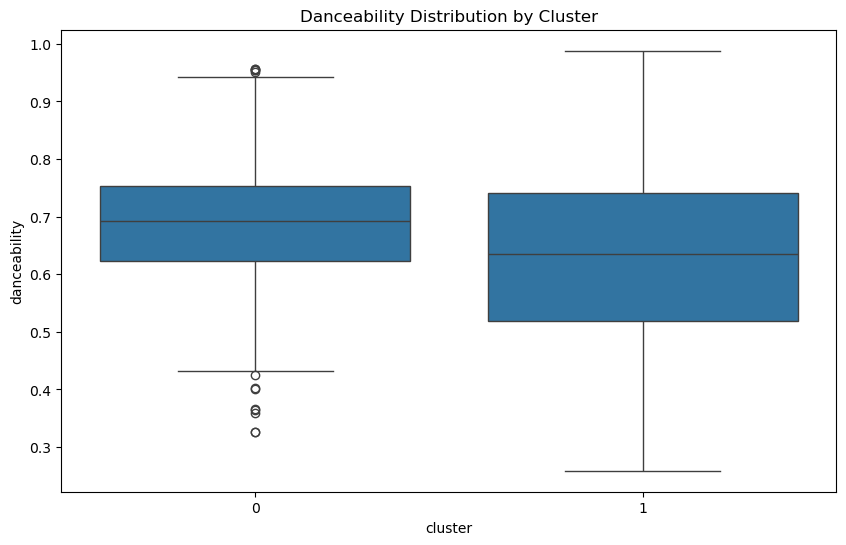

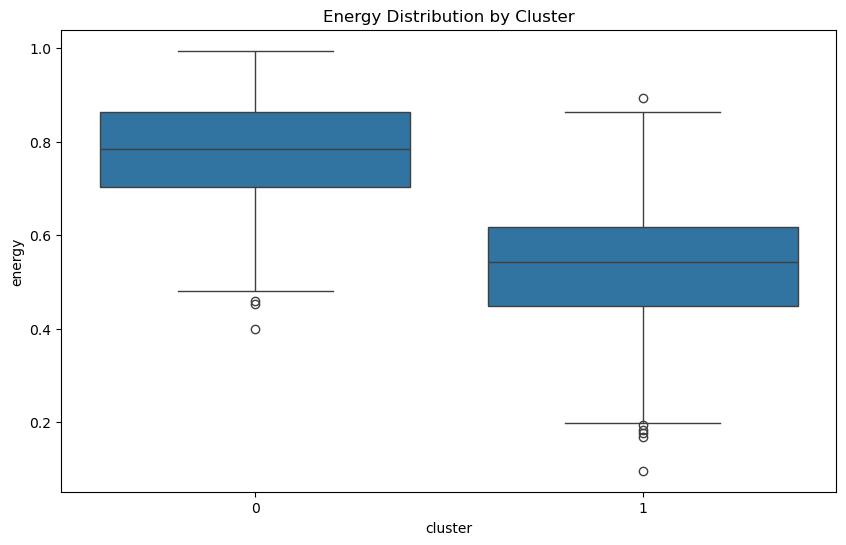

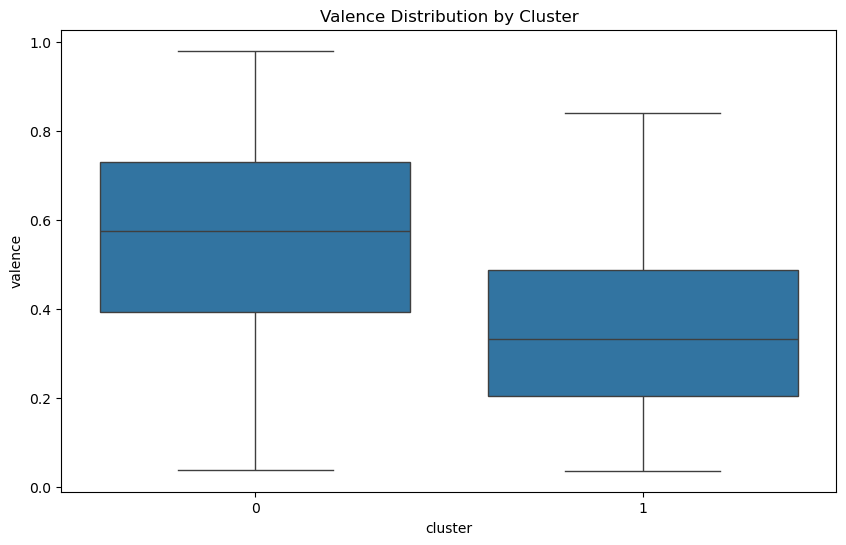

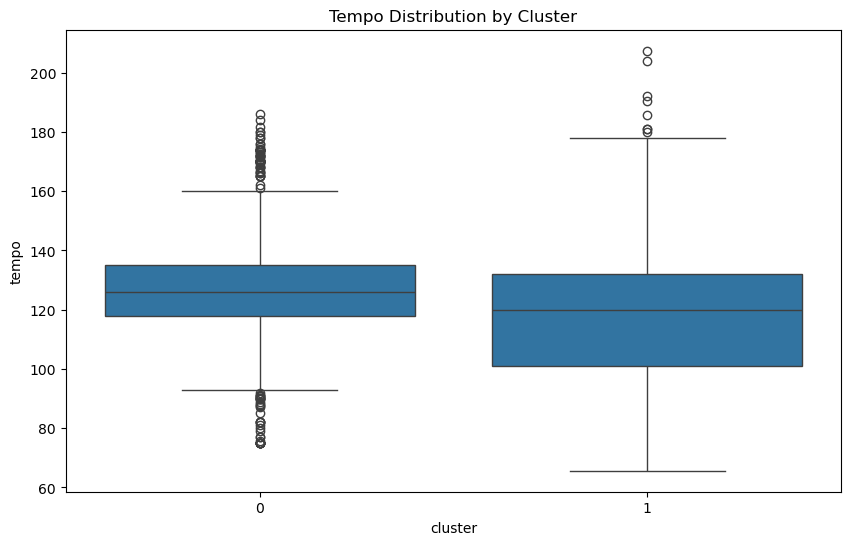

ValueError: Could not interpret value `feature5` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [73]:
# Plot distributions of features by Cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'{feature.capitalize()} Distribution by Cluster')
    plt.show()


## Box Plot: Feature Distribution Across Clusters

C:\Users\ngaut\AppData\Local\Temp\ipykernel_1860\4294467630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='danceability', data=df, palette='viridis')


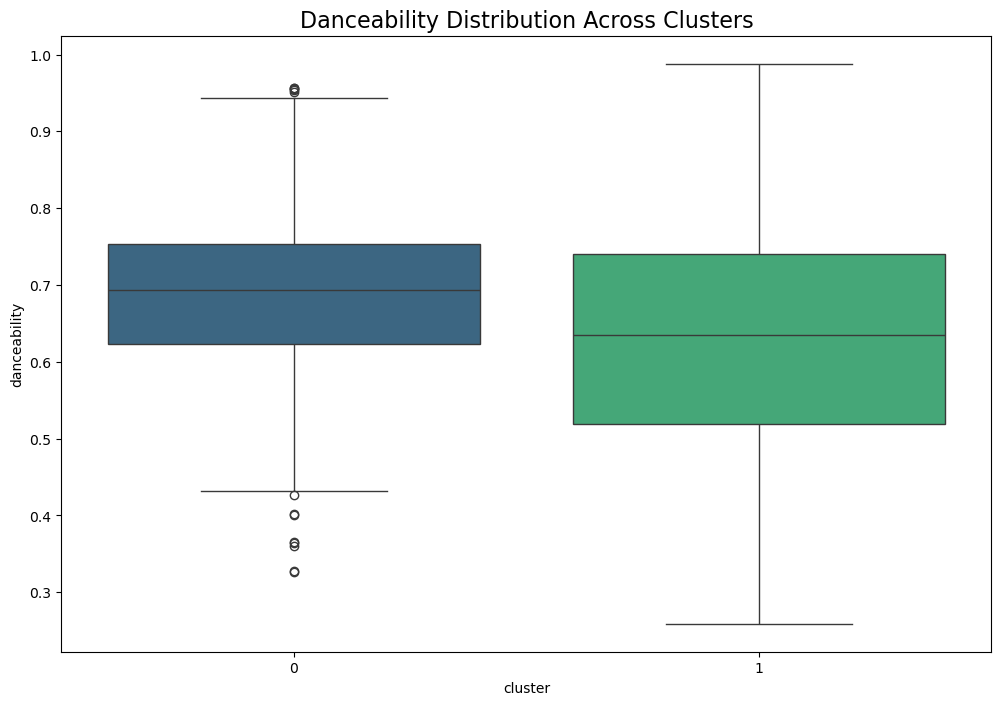

In [80]:
# Boxplot for each feature by cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='danceability', data=df, palette='viridis')
plt.title("Danceability Distribution Across Clusters", fontsize=16)
plt.show()


C:\Users\ngaut\AppData\Local\Temp\ipykernel_1860\2195867977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='energy', data=df, palette='viridis')


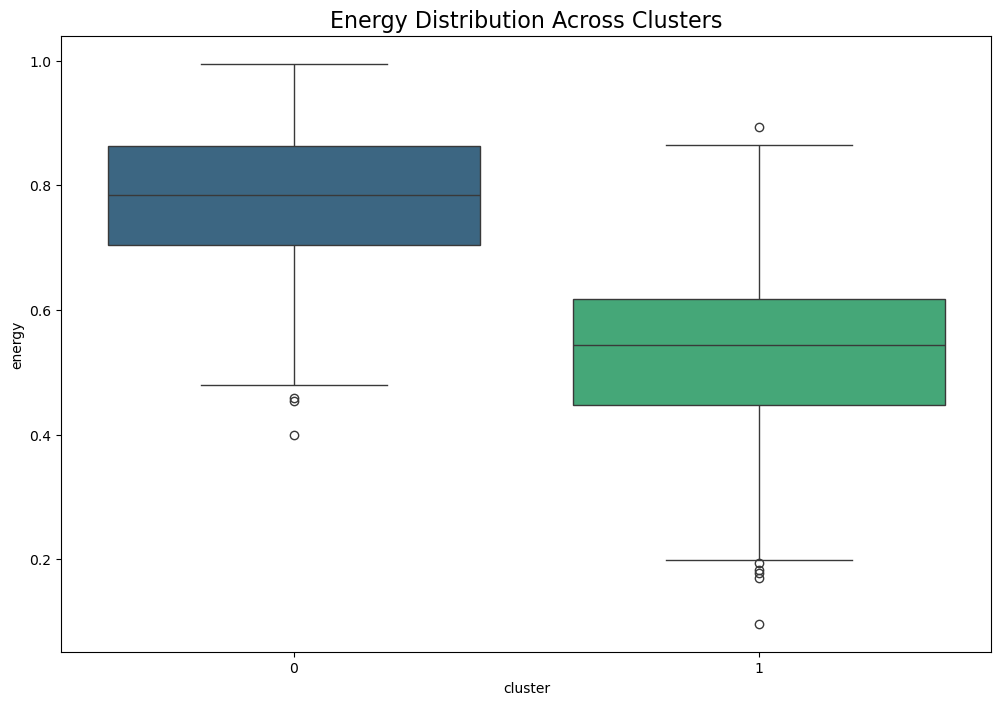

In [84]:
# Boxplot for each feature by cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='energy', data=df, palette='viridis')
plt.title("Energy Distribution Across Clusters", fontsize=16)
plt.show()


C:\Users\ngaut\AppData\Local\Temp\ipykernel_1860\2030806879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='valence', data=df, palette='viridis')


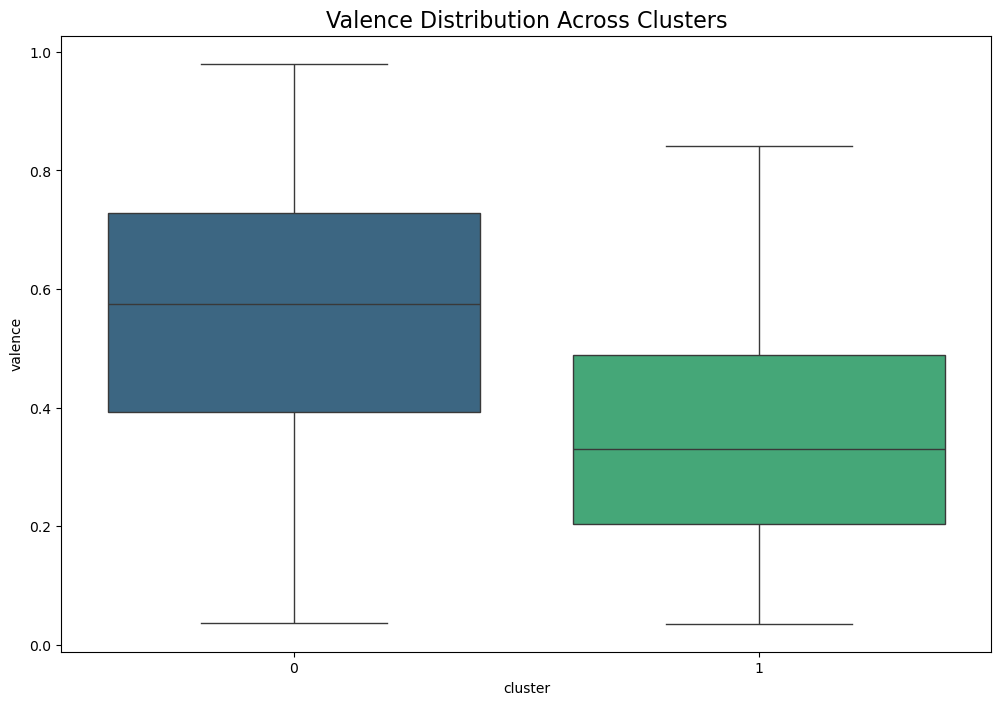

In [86]:
# Boxplot for each feature by cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='valence', data=df, palette='viridis')
plt.title("Valence Distribution Across Clusters", fontsize=16)
plt.show()


C:\Users\ngaut\AppData\Local\Temp\ipykernel_1860\2301751158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='tempo', data=df, palette='viridis')


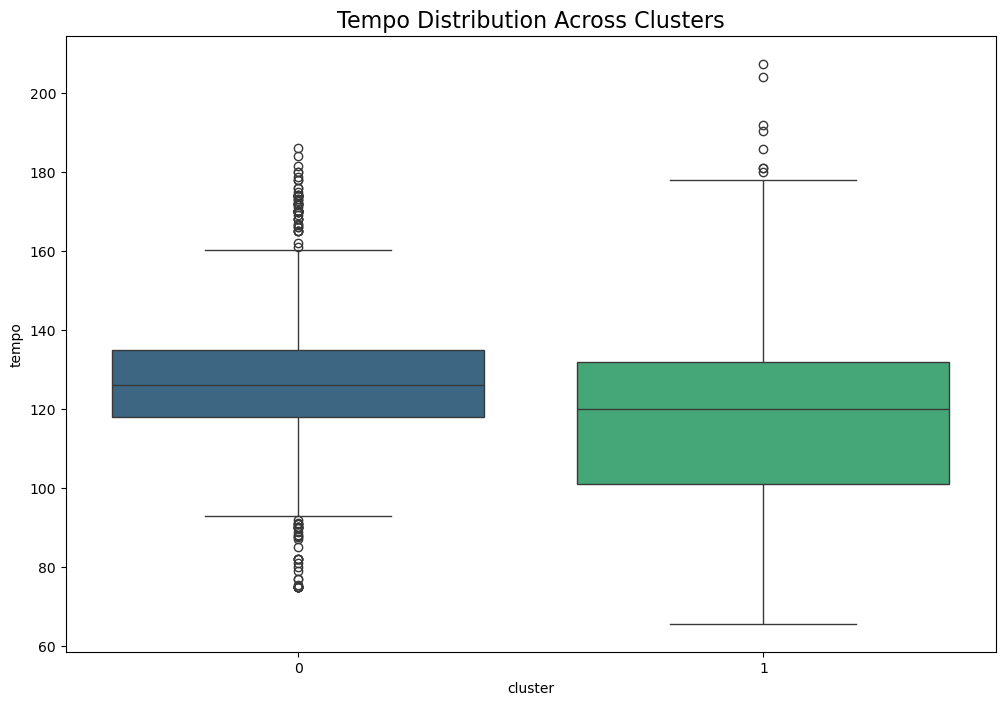

In [88]:
# Boxplot for each feature by cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='tempo', data=df, palette='viridis')
plt.title("Tempo Distribution Across Clusters", fontsize=16)
plt.show()


## Pie Chart: Cluster Distribution

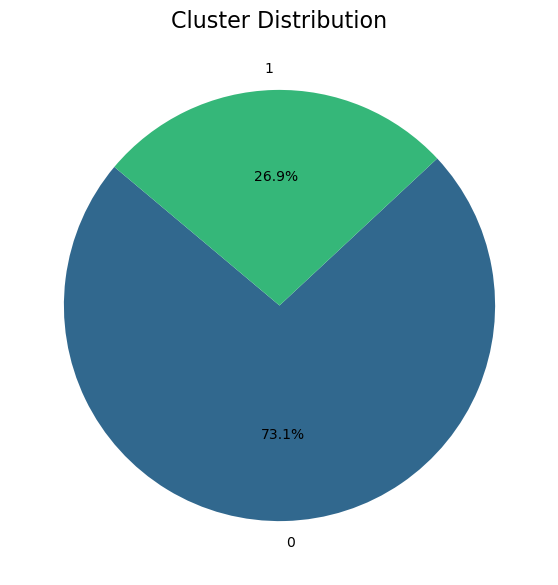

In [91]:
# Pie chart to show the distribution of clusters
cluster_counts = df['cluster'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=2))
plt.title("Cluster Distribution", fontsize=16)
plt.show()
